## Data Preproccessing

As data is in several csvs and saved in JSON format, we have to do some preprocessing before anything.


In [113]:
import numpy as np
import pandas as pd
import matplotlib as plt
from ast import literal_eval
from nltk.stem.snowball import SnowballStemmer

## Credits

In [114]:
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')

In [115]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [116]:
credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [117]:
credits.drop_duplicates(inplace=True)

In [ ]:
IMPORTANT_JOBS = {
    "Director": "director",
    "Writer": "writer",
    "Screenplay": "writer",   # merge into writer
    "Story": "writer",        # merge into writer
    "Original Music Composer": "composer",
    "Producer": "producer"
}

def get_important_crew(crew_list):
    """
    crew_list: parsed JSON from 'crew' column (list of dicts)
    Returns a dict with the important crew roles (1 per role, if multiple take the first match).
    """
    crew_info = {"director": np.nan,
                 "writer": np.nan,
                 "producer": np.nan,
                 "composer": np.nan}
    
    for member in crew_list:
        job = member.get("job")
        if job in IMPORTANT_JOBS:
            key = IMPORTANT_JOBS[job]
            
            # only fill if empty (keep the first one)
            if pd.isna(crew_info[key]):
                crew_info[key] = member.get("name")
    
    return crew_info

In [ ]:
credits['crew'] = credits['crew'].apply(literal_eval)
credits['job'] = credits['crew'].apply(get_important_crew)

In [120]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
 3   job     44621 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [121]:
credits['cast'] = credits['cast'].apply(literal_eval)

## get only the top 4 cast
credits['cast'] = credits['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
credits['cast'] = credits['cast'].apply(lambda x: x[:4] if len(x) >= 4 else x)

In [122]:
credits['cast'] = credits['cast'].apply(
    lambda x: [str(i).lower().replace(" ", "") for i in x] if isinstance(x, list) else []
)

credits['job'] = credits['job'].apply(
    lambda x: [str(i).lower().replace(" ", "") for i in x] if isinstance(x, list) else []
)

In [123]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
 3   job     45439 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [124]:
credits.head()

,cast,crew,id,job
0,"[tomhanks, timallen, donrickles, jimvarney]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[johnlasseter, josswhedon, andrewstanton, joel..."
1,"[robinwilliams, jonathanhyde, kirstendunst, br...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[jonathanhensleigh, jameshorner, joejohnston, ..."
2,"[waltermatthau, jacklemmon, ann-margret, sophi...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[howarddeutch, markstevenjohnson]"
3,"[whitneyhouston, angelabassett, lorettadevine,...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[forestwhitaker, ronaldbass, ezraswerdlow, deb..."
4,"[stevemartin, dianekeaton, martinshort, kimber...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[alansilvestri, nancymeyers, alberthackett, ch..."


In [125]:
newCredits = credits.drop(["crew"], axis=1)

In [126]:
newCredits.to_csv('NewCredits.csv', index=False)

## Keywords

In [127]:
keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [128]:
keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [129]:
keywords.drop_duplicates(inplace=True)

In [130]:
keywords['keywords'] = keywords['keywords'].apply(literal_eval)

In [131]:
keywords['keywords'] = keywords['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [132]:
keywords.head()

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [133]:
s = keywords.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [134]:
s = s.value_counts()
s[:5]

keyword
woman director      3039
independent film    1914
murder              1285
based on novel       822
musical              726
Name: count, dtype: int64

In [135]:
s = s[s > 1]

In [136]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [137]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [138]:
keywords['keywords'] = keywords['keywords'].apply(filter_keywords)
keywords['keywords'] = keywords['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
keywords['keywords'] = keywords['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [139]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45432 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [140]:
keywords.to_csv('NewKeywords.csv', index=False)

## Movies Dataset

In [169]:
movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
movies.head()

/tmp/ipykernel_103/2999627605.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [170]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [171]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [172]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [173]:
for i in range(movies.shape[0]):
    if is_float(movies.loc[i, 'production_countries']) or is_float(movies.loc[i, 'production_companies']):
        movies.drop(index=i, inplace=True)

In [174]:
movies.dropna(subset=['production_companies', 'production_countries'], inplace=True)

In [175]:
movies = movies.fillna("NaN")

/tmp/ipykernel_103/1184916427.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies = movies.fillna("NaN")


In [176]:
movies.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [177]:
def get_new_text(text, obj='name'):
    if(text == 'NaN'):  
         return np.nan
    elif (isinstance(literal_eval(str(text)), float)):
        return np.nan
    else:
        text = literal_eval(str(text))
        for i in text:
            if(i == obj):     
                return (text[i])

In [178]:
movies['name_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "name")
movies['id_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "id")
movies['poster_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "poster_path")
movies['backdrop_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "backdrop_path")

In [179]:
def get_text(text, obj='name'):
    text = literal_eval(text)
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text: 
            s.append(str(i[obj]))
        return s

In [ ]:
movies['genres'] = movies['genres'].apply(get_text ,obj = "name")
movies['name_production_countries'] = movies['production_countries'].apply(get_text ,obj = "name")
movies['name_production_companies'] = movies['production_companies'].apply(get_text ,obj = "name")

In [ ]:
movies['genres'] = movies['genres'].apply(
    lambda x: [str(i).lower().replace(" ", "") for i in x] if isinstance(x, list) else []
)

In [181]:
movies.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average,vote_count,name_belongs_to_collection,id_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection,name_production_countries,iso_3166_1_production_companies,name_production_companies,id_production_companies
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,7.7,5415.0,Toy Story Collection,10194.0,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,United States of America,US,Pixar Animation Studios,3
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,6.9,2413.0,NaN,NaN,NaN,NaN,United States of America,US,"[TriStar Pictures, Teitler Film, Interscope Co...","[559, 2550, 10201]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,6.5,92.0,Grumpy Old Men Collection,119050.0,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,United States of America,US,"[Warner Bros., Lancaster Gate]","[6194, 19464]"
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,6.1,34.0,NaN,NaN,NaN,NaN,United States of America,US,Twentieth Century Fox Film Corporation,306
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,5.7,173.0,Father of the Bride Collection,96871.0,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,United States of America,US,"[Sandollar Productions, Touchstone Pictures]","[5842, 9195]"


AttributeError: module 'matplotlib' has no attribute 'show'

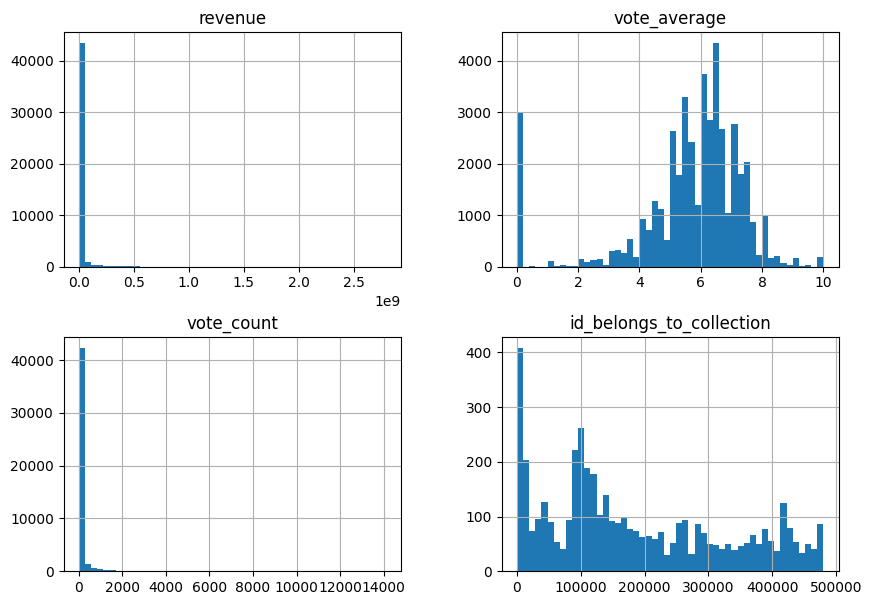

In [182]:
movies.hist(bins=50, figsize=(10, 7))
plt.show()

In [ ]:
newMovies = movies.drop(["belongs_to_collection"] ,axis=1)
newMovies.to_csv('NewMoviesMetadata.csv', index=False)